In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


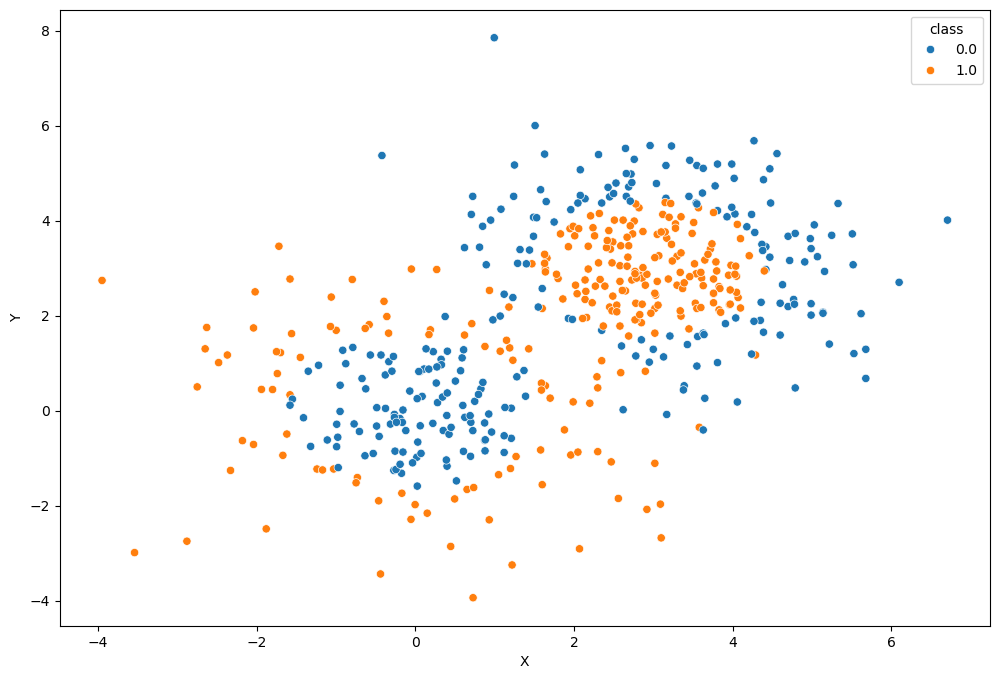

In [3]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
### Your code is here

x_circ = circ.drop(columns='class')
y_circ = circ['class']


model_circ = LogisticRegression()
model_circ.fit(x_circ, y_circ)

predict_circ = model_circ.predict(x_circ)
accuracy_circ = accuracy_score(y_circ, predict_circ)

print(accuracy_circ)

0.424


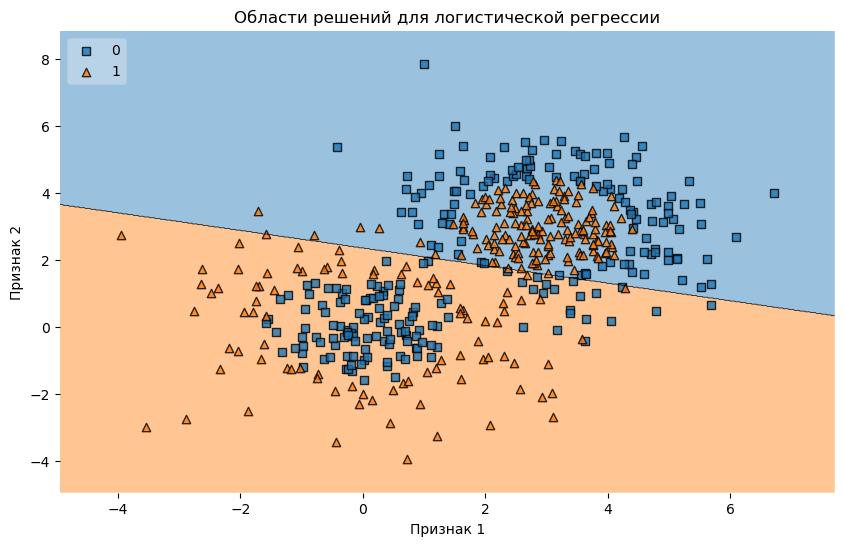

In [5]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure()

fig.set_size_inches(10, 6)
plot_decision_regions(x_circ.values, y_circ.values.astype(int), clf=model_circ, legend=2)

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Области решений для логистической регрессии')
plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [6]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

all_clfs = []
knn_train_accuracy = []
knn_test_accuracy = []


for k in all_k:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    all_clfs.append(knn)

    predict_train = knn.predict(X_train)
    predict_test = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, predict_train)
    test_accuracy = accuracy_score(y_test, predict_test)

    knn_train_accuracy.append(train_accuracy)
    knn_test_accuracy.append(test_accuracy)

    print(f'k = {k}, train accuracy = {train_accuracy}, test accuracy = {test_accuracy}')
    


k = 1, train accuracy = 1.0, test accuracy = 0.89
k = 3, train accuracy = 0.9475, test accuracy = 0.87
k = 10, train accuracy = 0.915, test accuracy = 0.85
k = 30, train accuracy = 0.8525, test accuracy = 0.74
k = 40, train accuracy = 0.8, test accuracy = 0.75
k = 60, train accuracy = 0.6925, test accuracy = 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [9]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

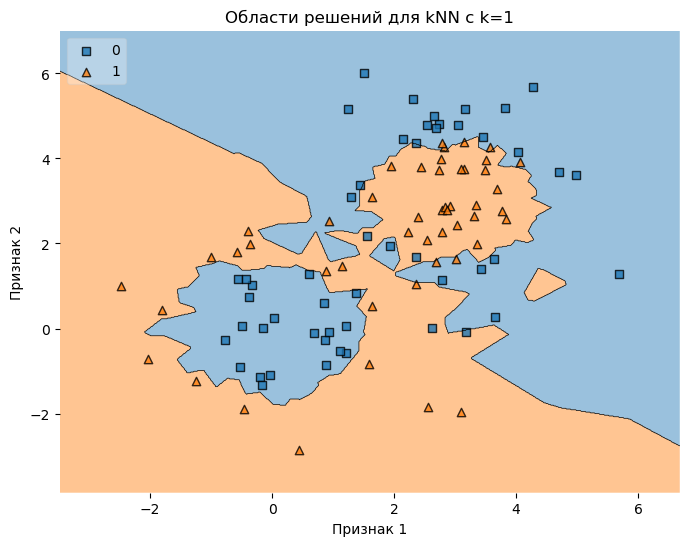

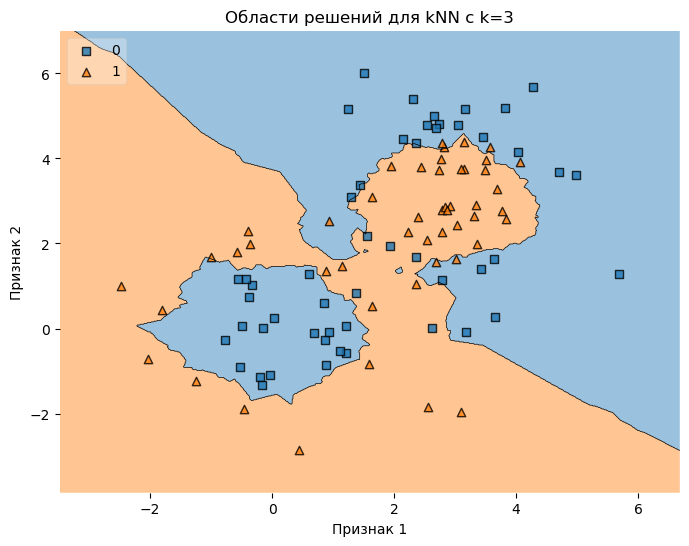

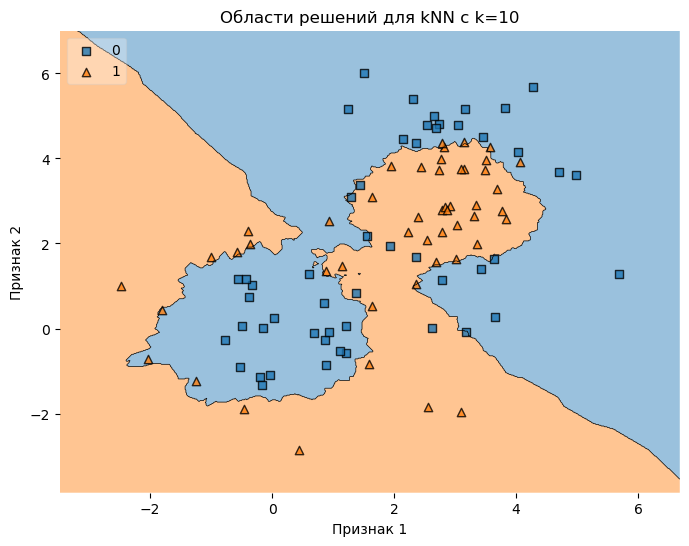

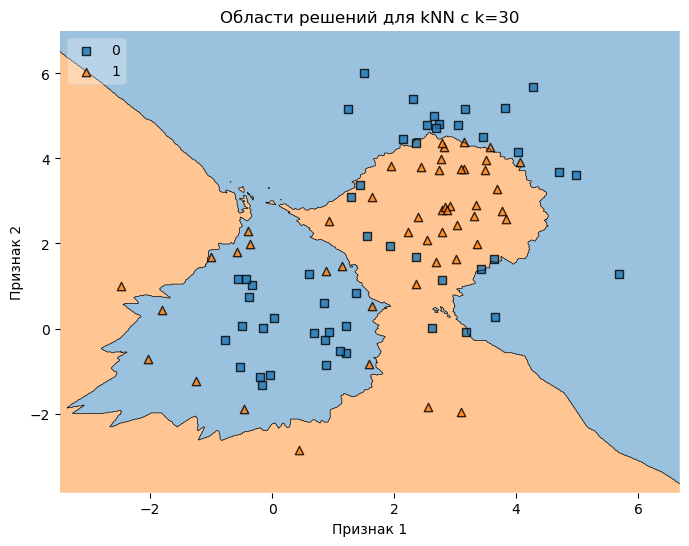

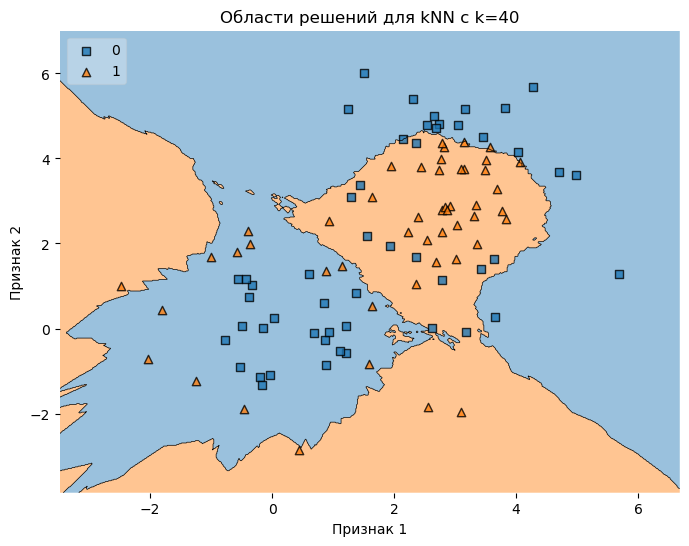

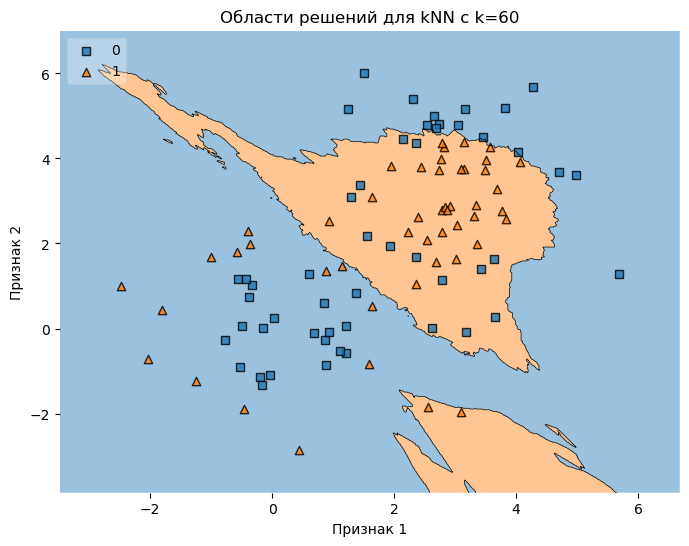

In [10]:
### Your code is here

for k, clf in zip(all_k, all_clfs):
    fig = plt.figure(figsize=(8, 6)) 
    plot_decision_regions(X_test, y_test, clf=clf, legend=2)
    plt.xlabel('Признак 1') 
    plt.ylabel('Признак 2')
    plt.title(f'Области решений для kNN с k={k}')  
    plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?  При увеличении числа соседей модель становится обобщенной и теряет важные детали
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики. Оптимальным количеством явлется k=10, тк модель не переобучена, нет изломов, но еще и не игнорирует локальные особенности.
3. Лучше ли справляется kNN по сравнению с логистической регрессией? Значительно

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [11]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [13]:
### Your code is here
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe_not_scaler = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [1, 5, 10]
}

grid_search_scaler = GridSearchCV(pipe_scaler, param_grid)
grid_search_not_scaler = GridSearchCV(pipe_not_scaler, param_grid)

grid_search_scaler.fit(X_train, y_train)
grid_search_not_scaler.fit(X_train, y_train)

print(f'Best params for scalered data: {grid_search_scaler.best_params_}')
print(f'Best params for not scalered data: {grid_search_not_scaler.best_params_}')

model_scaler = grid_search_scaler.best_estimator_
model_not_scaler = grid_search_not_scaler.best_estimator_

scaler_predict = model_scaler.predict(X_test)
not_scaler_predict = model_not_scaler.predict(X_test)

print(f'Accuracy on test scaler data: {accuracy_score(y_test, scaler_predict)}')
print(f'Accuracy on test not scaler data: {accuracy_score(y_test, not_scaler_predict)}')

Best params for scalered data: {'knn__n_neighbors': 10}
Best params for not scalered data: {'knn__n_neighbors': 10}
Accuracy on test scaler data: 0.6607678578209851
Accuracy on test not scaler data: 0.4703603843086621


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [14]:
### Your code is here

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_minkowski_p1 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
knn_minkowski_p1.fit(X_train_scaled, y_train)


y_pred_p1 = knn_minkowski_p1.predict(X_test_scaled)

accuracy_p1 = accuracy_score(y_test, y_pred_p1)
print(f'Accuracy with Minkowski distance (p=1): {accuracy_p1:.2f}')


Accuracy with Minkowski distance (p=1): 0.66


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [15]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

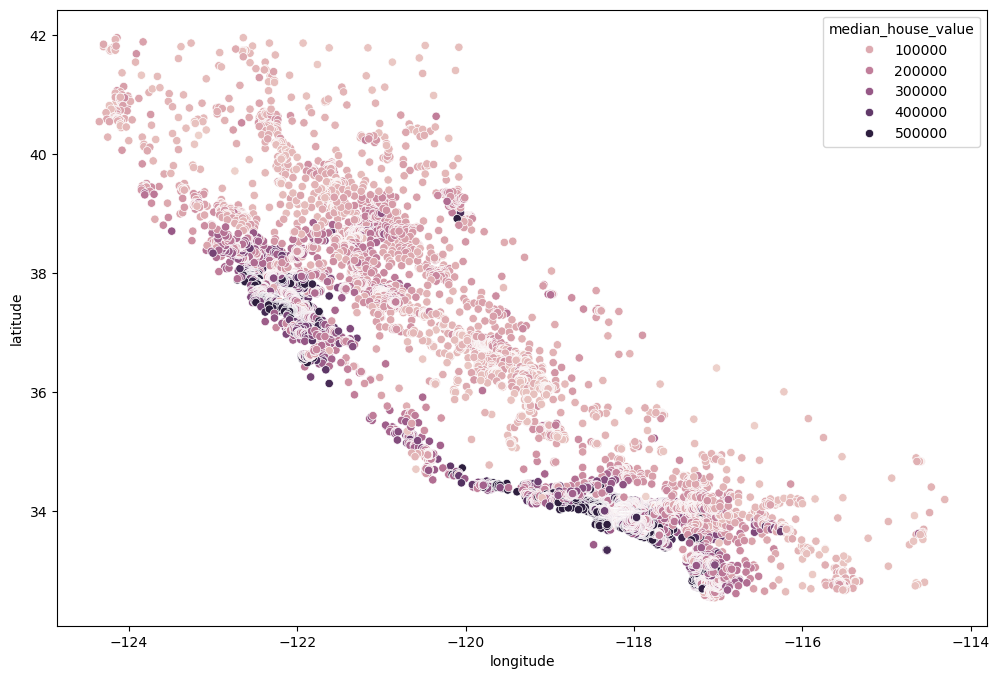

In [16]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y)

In [17]:
### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, predict_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predict_test))

print(f'RMSE train = {rmse_train}')
print(f'RMSE test = {rmse_test}')

RMSE train = 100948.39976676002
RMSE test = 98369.87709657698


In [18]:
from sklearn.neighbors import KNeighborsClassifier

all_k = [1, 2, 3, 4, 5, 6, 7, 8, 9]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Your code is here

all_clfs = []
knn_train_accuracy = []
knn_test_accuracy = []


for k in all_k:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    all_clfs.append(knn)

    predict_train = knn.predict(X_train)
    predict_test = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, predict_train)
    test_accuracy = accuracy_score(y_test, predict_test)

    knn_train_accuracy.append(train_accuracy)
    knn_test_accuracy.append(test_accuracy)

    print(f'k = {k}, train accuracy = {train_accuracy}, test accuracy = {test_accuracy}')
    


k = 1, train accuracy = 0.6682412790697675, test accuracy = 0.025920542635658916
k = 2, train accuracy = 0.42926356589147285, test accuracy = 0.01937984496124031
k = 3, train accuracy = 0.31480135658914726, test accuracy = 0.02422480620155039
k = 4, train accuracy = 0.24884932170542637, test accuracy = 0.02640503875968992
k = 5, train accuracy = 0.2102107558139535, test accuracy = 0.029796511627906978
k = 6, train accuracy = 0.17956637596899225, test accuracy = 0.03173449612403101
k = 7, train accuracy = 0.1595203488372093, test accuracy = 0.032703488372093026
k = 8, train accuracy = 0.14407703488372092, test accuracy = 0.03391472868217054
k = 9, train accuracy = 0.13450823643410853, test accuracy = 0.03439922480620155


In [28]:
from sklearn.neighbors import KNeighborsRegressor

all_h = [0.02, 0.1, 0.01]

def kernel(distances, h):
    const = 1 / (np.sqrt(2 * np.pi))
    power = (-1/2) * ((distances)**2) / h**2
    return const * np.exp(power)

for h in all_h:
    pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('KNN', KNeighborsRegressor(n_neighbors=9, 
                                    weights=lambda distances: kernel(distances, h)))
    ])

    pipe.fit(X_train, y_train)

    predict_test = pipe.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predict_test))
    print(f"h = {h} RMSE на тесте: {rmse:.4f}")

h = 0.02 RMSE на тесте: 52792.3379
h = 0.1 RMSE на тесте: 53029.1737
h = 0.01 RMSE на тесте: 52655.7126
